In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot, show_result
import mmcv
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
config_file = '../configs/htc/htc_dconv_c3-c5_mstrain_400_1400_x101_64x4d_fpn_20e.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../checkpoints/htc_dconv_c3-c5_mstrain_400_1400_x101_64x4d_fpn_20e_20190408-0e50669c.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [4]:
'''
# test a single image
from time import sleep
from IPython import display
video = mmcv.VideoReader('su/naver1.mp4')
for i in range(len(video)):
    img = video[i]
    #result = inference_detector(model, img)
    #image = show_result(img, result, model.CLASSES, wait_time=1,show=False)
    path = 'su/frames2/' + str(i) + '.jpg'
    mmcv.imwrite(img, path)
mmcv.frames2video('images/su/frames2','images/su/frames2/video.mp4')
'''

"\n# test a single image\nfrom time import sleep\nfrom IPython import display\nvideo = mmcv.VideoReader('su/naver1.mp4')\nfor i in range(len(video)):\n    img = video[i]\n    #result = inference_detector(model, img)\n    #image = show_result(img, result, model.CLASSES, wait_time=1,show=False)\n    path = 'su/frames2/' + str(i) + '.jpg'\n    mmcv.imwrite(img, path)\nmmcv.frames2video('images/su/frames2','images/su/frames2/video.mp4')\n"

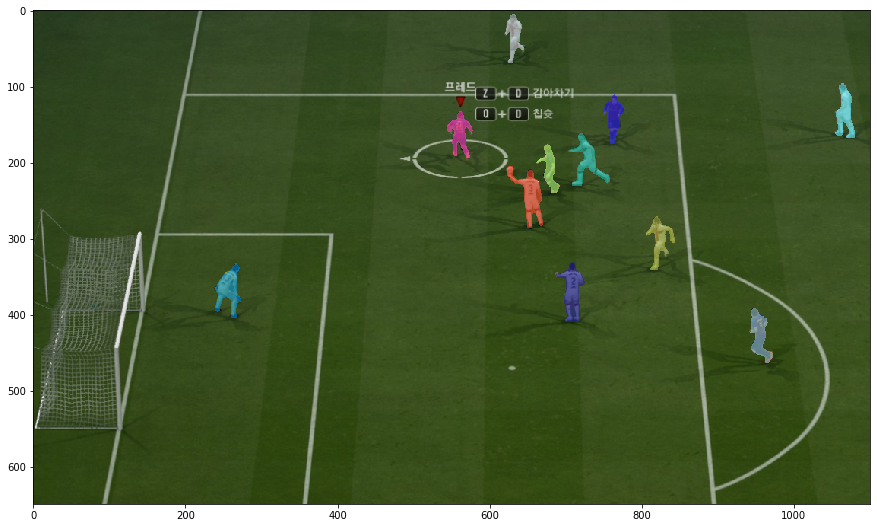

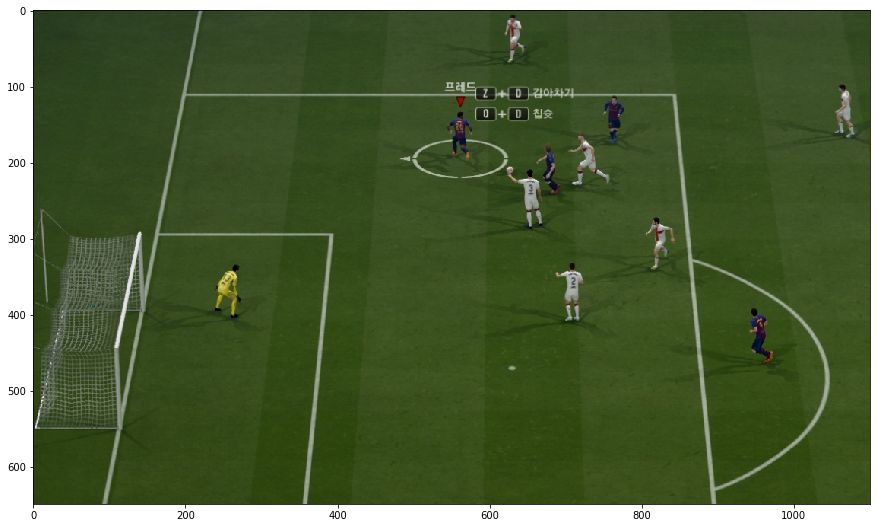

In [9]:
# show the results
img = 'images/su/test.png'
image = mmcv.imread(img)
result = inference_detector(model, img)
show_result_pyplot(img, result, model.CLASSES,score_thr=0.5)

plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(image))

In [6]:
import cv2
img = 'output/video_frames/30F/00025.jpg'
image = mmcv.imread(img)

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

img_sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

img_sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)


img_sobel = cv2.addWeighted(img_sobel_x, 1, img_sobel_y, 1, 0);
img_sobel = mmcv.bgr2rgb(img_sobel)
plt.figure(figsize = (20,10))
plt.imshow(img_result, aspect='auto')
plt.imshow(img_sobel)

NameError: name 'img_result' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
import cv2
image = mmcv.bgr2rgb(image)
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
image2 = image.copy()

lower_green = (32, 0, 20)
upper_green = (85, 255, 180)

img_mask = cv2.inRange(hsv, lower_green, upper_green)
img_result = image - cv2.bitwise_and(image, image, mask=img_mask)

# for i in range(hsv.shapeimg_mask = cv2.inRange(img_hsv, lower_orange, upper_orange)[0]):
#     for j in range(hsv.shape[1]):
#         if( 40 <= hsv[i,j,0] and hsv[i,j,0]<=85):
#             image2[i,j,:] = 0
plt.figure(figsize = (20,10))
plt.imshow(img_result, aspect='auto')
image2 = img_result

In [ ]:
from time import sleep
from IPython import display
video = mmcv.VideoReader('images/su/video.mp4')
for i in range(len(video)):
    img = video[i]
    result = inference_detector(model, img)
    image = show_result(img, result, model.CLASSES, show=False,score_thr=0.24)
    path = 'images/su/frames3/' + "{:02d}".format(i) + '.jpg'
    mmcv.imwrite(image, path)
mmcv.frames2video('images/su/frames3','images/su/frames3/video.avi',filename_tmpl='{:02d}.jpg', fps=10, fourcc='MJPG')

In [ ]:
from time import sleep
from IPython import display
video_name = 'test'
video_full_name = 'test.avi'
video = mmcv.VideoReader('/home/dipd/github/DataSets/0829/' + video_full_name)
for i in range(len(video)):
    img = video[i]
    #result = inference_detector(model, img)
    #image = show_result(img, result, model.CLASSES, show=False,score_thr=0.24)
    path = 'output/video_frames/' + video_name + '/' + "{:05d}".format(i) + '.jpg'
    mmcv.imwrite(img, path)
#mmcv.frames2video('output/video_frames','output/' + video_full_name,filename_tmpl='{:02d}.jpg', fps=10, fourcc='MJPG')

In [ ]:
mmcv.frames2video('output/video_frames/'+ video_name,'output/video_frames/' +video_full_name ,filename_tmpl='{:02d}.jpg', fps=10, fourcc='MJPG')

In [ ]:
import os
os.path.abspath("")